![Cover](https://pbs.twimg.com/media/FZ5t5WqXwAE3SVm?format=jpg&name=medium)

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

[Click to see my article on Decision Tree Regression](https://medium.com/machine-learning-researcher/decision-tree-algorithm-in-machine-learning-248fb7de819e)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>

<b>New York City - East River Bicycle Crossings:</b> The New York City Department of Transportation collects daily data about the number of bicycles going over bridges in New York City. This data is used to measure bike utilization as a part of transportation planning. This dataset is a daily record of the number of bicycles crossing into or out of Manhattan via one of the East River bridges (that is, excluding Bronx thruways and the non-bikeable Hudson River tunnels) for a stretch of 9 months. <br>

<b> Content </b> <br>
A count of the number of bicycles on each of the bridges in question is provided on a day-by-day basis, along with information on maximum and minimum temperature and precipitation.

<b> Link: </b> <br>
https://data.cityofnewyork.us/Transportation/Bicycle-Counts-for-East-River-Bridges-Historical-/gua4-p9wg

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue> Import the Libraries

In [77]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#### <font color = blue>Import the Dataset

In [78]:
df = pd.read_csv("Dataset/nyc-east-river-bicycle-counts.csv")
df.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,4/1/2016 0:00,4/1/2016 0:00,78.1,66.0,0.01,1704,3126,4115,2552,11497
1,1,4/2/2016 0:00,4/2/2016 0:00,55.0,48.9,0.15,827,1646,2565,1884,6922
2,2,4/3/2016 0:00,4/3/2016 0:00,39.9,34.0,0.09,526,1232,1695,1306,4759
3,3,4/4/2016 0:00,4/4/2016 0:00,44.1,33.1,0.47,521,1067,1440,1307,4335
4,4,4/5/2016 0:00,4/5/2016 0:00,42.1,26.1,0.00,1416,2617,3081,2357,9471


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Summary and Visualization</font>

#### <font color = blue>Data shape

In [79]:
print("Number of columns:", df.shape[1])
print("Number of rows: ", df.shape[0])

Number of columns: 11
Number of rows:  210


#### <font color = blue>Data Info

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           210 non-null    int64  
 1   Date                 210 non-null    object 
 2   Day                  210 non-null    object 
 3   High Temp (°F)       210 non-null    float64
 4   Low Temp (°F)        210 non-null    float64
 5   Precipitation        210 non-null    float64
 6   Brooklyn Bridge      210 non-null    int64  
 7   Manhattan Bridge     210 non-null    int64  
 8   Williamsburg Bridge  210 non-null    int64  
 9   Queensboro Bridge    210 non-null    int64  
 10  Total                210 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 18.2+ KB


#### <font color = blue>Data Description

In [82]:
df.describe()

,Unnamed: 0,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,104.500000,60.580000,46.413333,0.052333,2269.633333,4049.533333,4862.466667,3352.866667,14534.500000
std,60.765944,11.183223,9.522796,0.102148,981.237786,1704.731356,1814.039499,1099.254419,5569.173496
min,0.000000,39.900000,26.100000,0.000000,504.000000,997.000000,1440.000000,1306.000000,4335.000000
25%,52.250000,55.000000,44.100000,0.000000,1447.000000,2617.000000,3282.000000,2457.000000,9596.000000
50%,104.500000,62.100000,46.900000,0.000000,2379.500000,4165.000000,5194.000000,3477.000000,15292.500000
75%,156.750000,68.000000,50.000000,0.090000,3147.000000,5309.000000,6030.000000,4192.000000,18315.000000
max,209.000000,81.000000,66.000000,0.470000,3871.000000,6951.000000,7834.000000,5032.000000,23318.000000


#### <font color = blue> Check the Correaltion of Features

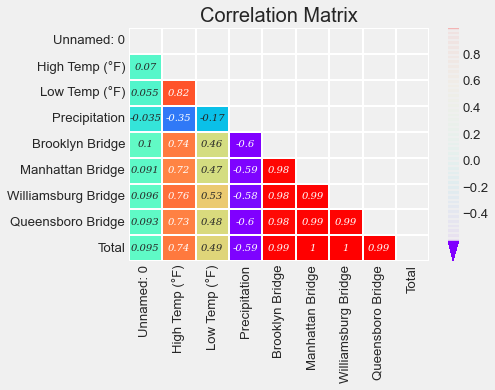

In [83]:
# Define the figure size
#plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Check Missing Value </font>

In [84]:
df.isnull().sum()

Unnamed: 0             0
Date                   0
Day                    0
High Temp (°F)         0
Low Temp (°F)          0
Precipitation          0
Brooklyn Bridge        0
Manhattan Bridge       0
Williamsburg Bridge    0
Queensboro Bridge      0
Total                  0
dtype: int64

no missig value found

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Remove Unwanted Columns </font>

In [85]:
df = df.drop(['Unnamed: 0', 'Day', 'Date'], axis=1)
df.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,78.1,66.0,0.01,1704,3126,4115,2552,11497
1,55.0,48.9,0.15,827,1646,2565,1884,6922
2,39.9,34.0,0.09,526,1232,1695,1306,4759
3,44.1,33.1,0.47,521,1067,1440,1307,4335
4,42.1,26.1,0.00,1416,2617,3081,2357,9471


### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Define Predictor and Target Attribute </font>

In [86]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

#### <font color = blue> Predictor Attribute

In [87]:
X.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge
0,78.1,66.0,0.01,1704,3126,4115,2552
1,55.0,48.9,0.15,827,1646,2565,1884
2,39.9,34.0,0.09,526,1232,1695,1306
3,44.1,33.1,0.47,521,1067,1440,1307
4,42.1,26.1,0.00,1416,2617,3081,2357


#### <font color = blue> Target Attribute

In [88]:
Y.head()

0    11497
1     6922
2     4759
3     4335
4     9471
Name: Total, dtype: int64

### <font color = #27C3E5> 2.5: </font> <font color = #41EA46> Split the Data into Train and Test </font>

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### <font color = blue> Training Data

In [90]:
print("X_test", X_train.shape)
print("X_test", y_train.shape)

X_test (168, 7)
X_test (168,)


#### <font color = blue> Testing Data

In [91]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (42, 7)
X_test (42,)


### <font color = #27C3E5> 2.6: </font> <font color = #41EA46> Feature Scaling </font>

In [92]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

pd.DataFrame(X_test).head()  # Same Scale

,0,1,2,3,4,5,6
0,-0.377462,-0.723811,-0.495393,0.532369,0.742444,0.584688,0.729635
1,0.885437,0.342858,-0.495393,1.134141,1.356073,1.370364,1.290559
2,-1.532881,-1.441964,4.058304,-1.809092,-1.770129,-1.916188,-1.876269
3,-1.452270,-1.769357,-0.495393,-0.431881,-0.456950,-0.589708,-0.483443
4,-1.631405,-0.935032,0.376591,-1.826257,-1.810767,-1.879402,-1.700134


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Build the Decision Tree Regression </font>
In this part, we build Decision Tree Regression Model using Scikit-Learn

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue> Import Model from Sklearn

In [93]:
from sklearn.tree import DecisionTreeRegressor

#### <font color = blue> Initialize the Model

In [105]:
regressor = DecisionTreeRegressor(max_depth=3, random_state = 0)

#### <font color = blue> Fit the Model

In [106]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

#### <font color = blue> Predict the Test Data</font>

In [107]:
y_pred = regressor.predict(X_test)
y_pred

array([17976.16216216, 22791.33333333,  4522.1875    , 12655.36666667,
        4522.1875    , 15850.27272727, 20509.63636364,  4522.1875    ,
       12655.36666667,  9351.3125    , 15850.27272727,  9351.3125    ,
       12655.36666667, 12655.36666667,  9351.3125    , 20509.63636364,
       17976.16216216, 12655.36666667,  9351.3125    , 22791.33333333,
       22791.33333333, 15850.27272727, 12655.36666667, 12655.36666667,
        4522.1875    , 17976.16216216, 12655.36666667,  9351.3125    ,
        4522.1875    , 12655.36666667, 15850.27272727, 17976.16216216,
       22791.33333333,  7399.08333333, 12655.36666667, 12655.36666667,
       20509.63636364, 15850.27272727, 17976.16216216, 15850.27272727,
        7399.08333333, 12655.36666667])

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>
In this part, we evaluate the Decision Tree Regression Model. And for evaluation we will use three metrics. <br>
`R Square`: R Square measures how much variability in dependent variable can be explained by the model. <br>
`Mean Square Error`: MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. <br>
`Mean Absolute Error`: Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46>  Evaluate the Results </font>

In [108]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### <font color = blue>4.2.1: Calculate the Results

In [109]:
# R Square
R_Square = r2_score(y_pred, y_test)
print('R Square:', R_Square) 

# Mean Square Error
MSE = mean_squared_error(y_pred, y_test)
print('Mean Squared Error:', MSE)

# Mean Square Error
MAE = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error:', MAE)

R Square: 0.9898349974695154
Mean Squared Error: 289712.06677076913
Mean Absolute Error: 466.30885739635744


### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Visualize the Predicted Result </font>

In [110]:
from sklearn import tree
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_4 <= -0.08
|   |--- feature_3 <= -1.16
|   |   |--- feature_3 <= -1.65
|   |   |   |--- value: [4522.19]
|   |   |--- feature_3 >  -1.65
|   |   |   |--- value: [7399.08]
|   |--- feature_3 >  -1.16
|   |   |--- feature_3 <= -0.74
|   |   |   |--- value: [9351.31]
|   |   |--- feature_3 >  -0.74
|   |   |   |--- value: [12655.37]
|--- feature_4 >  -0.08
|   |--- feature_6 <= 0.82
|   |   |--- feature_4 <= 0.38
|   |   |   |--- value: [15850.27]
|   |   |--- feature_4 >  0.38
|   |   |   |--- value: [17976.16]
|   |--- feature_6 >  0.82
|   |   |--- feature_6 <= 1.18
|   |   |   |--- value: [20509.64]
|   |   |--- feature_6 >  1.18
|   |   |   |--- value: [22791.33]



![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 5: </font> <font color = #4854E8> Making A Single Prediction </font>
In this part, we make a single Prediction based on new observation

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue>How many  bicycles going over bridges if ..?

In [116]:
col = ['High Temp (°F)', 'Low Temp (°F)', 'Precipitation', 'Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge', 'Total']

pd.DataFrame([[67.2, 44.2, 0.22, 600, 1212, 4030, 2011, '?']], columns = col)

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,67.2,44.2,0.22,600,1212,4030,2011,?


In [121]:
regressor.predict(SS.transform(np.array([[67.2, 44.2, 0.22, 600, 1212, 4030, 2011]])))

array([4522.1875])

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<b>©</b>Amir Ali